![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Carga de datos

Carguen la base de datos preparada desde la fase 2.

In [5]:
#Cargo este DF que usaré al final para comparar:
HospitalOk_multi = pd.read_csv(r'HospitalOk_multi.csv')

In [6]:
Hospital = pd.read_csv(r'HospitalModelado.csv')
HospitalOk = Hospital.copy()

In [7]:
# Elimino los registros con valores nulos, y me quedo con 560 registros
HospitalOk.dropna(inplace=True)

# Preparación de Datos para Modelamiento

Aquí se balancearán los valores, para obtener un dataset con misma cantidad de valores objetivos 1 y 0

In [8]:
# Se separa el dataset según hospitalización SI/NO
registros_hospitalizacion_1 = HospitalOk[HospitalOk['HOSPITALIZACION'] == 1]
registros_hospitalizacion_0 = HospitalOk[HospitalOk['HOSPITALIZACION'] == 0]

# Se obtiene la cantidad de veces que hay que multiplicar los registros en 1 para aproximarse a los registros en 0
nro = int(len(registros_hospitalizacion_0)/len(registros_hospitalizacion_1))
# Se crea un DF de n repeticiones del df con hospitalización en 1
registros_hospitalizacion_1_multi = pd.concat([registros_hospitalizacion_1] * nro, ignore_index=True)
# Los n registros multiplicados se agregan al DF HospitalOk
HospitalOk = pd.concat([HospitalOk, registros_hospitalizacion_1_multi], ignore_index=True)

In [9]:
HospitalOk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDAD                        1086 non-null   int64  
 1   DIABETES                    1086 non-null   int64  
 2   HOSPITALIZACION ULTIMO MES  1086 non-null   int64  
 3   PSA                         1086 non-null   float64
 4   BIOPSIAS PREVIAS            1086 non-null   float64
 5   VOLUMEN PROSTATICO          1086 non-null   float64
 6   MUESTRAS TOMADAS            1086 non-null   int64  
 7   CUP                         1086 non-null   float64
 8   EPOC                        1086 non-null   float64
 9   BIOPSIA                     1086 non-null   int64  
 10  COMPLICACION POST BIOPSIA   1086 non-null   int64  
 11  FIEBRE                      1086 non-null   int64  
 12  ITU                         1086 non-null   int64  
 13  TIPO DE CULTIVO             1086 

Separen el dataset en X, y (variable objetivo)

In [10]:
# Desetimamos datos referidos a complicaciones infecciosas
X = HospitalOk.drop(columns=[
'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'])
y = HospitalOk['HOSPITALIZACION']

Separen el dataset en X_train, X_test, y_train y y_test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos Predictivos

# Árbol de Decisión

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [12]:
modelo_arbol = DecisionTreeClassifier(max_depth=16, criterion='gini', min_samples_split=10, random_state=42)

In [13]:
# Validación cruzada con cv=n divisiones de los conjuntos X e y
scores = cross_val_score(modelo_arbol, X, y, cv=5, scoring='f1_micro') #implícitamente hace un predict en cada cv

# Imprimir los resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
print(scores.tolist()) # NOTA: Observar que el primer valor es igual al score del conjunto de prueba
print("F1_micro promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Resultados de la Validación Cruzada:
[0.9954128440366973, 1.0, 0.9861751152073732, 0.9861751152073732, 0.9907834101382489]
F1_micro promedio: 0.9917092969179386
Desviación estándar: 0.005377055320446033


In [14]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, min_samples_split=10, random_state=42)

In [15]:
y_test_pred = modelo_arbol.predict(X_test)
y_train_pred = modelo_arbol.predict(X_train)
y_total_pred = modelo_arbol.predict(X)

In [16]:
# Medimos exactitud del modelo en conjunto de entrenamiento, prueba y total
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_total = accuracy_score(y, y_total_pred)

print(f"Exactitud PRUEBA: {accuracy_test}")
print(f"Exactitud ENTRENAMIENTO: {accuracy_train}")
print(f"Exactitud TOTAL: {accuracy_total}")

Exactitud PRUEBA: 0.9954128440366973
Exactitud ENTRENAMIENTO: 0.9976958525345622
Exactitud TOTAL: 0.9972375690607734


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [17]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_total = confusion_matrix(y, y_total_pred)


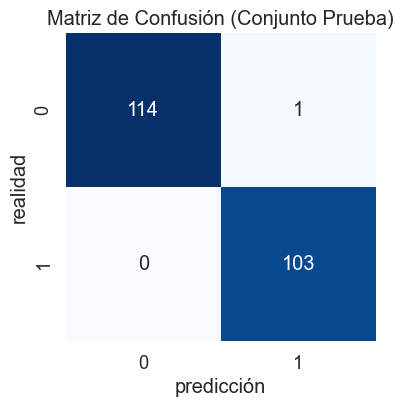

In [18]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicción')
plt.ylabel('realidad')
plt.title('Matriz de Confusión (Conjunto Prueba)')
plt.show()


In [19]:
verdaderos_positivos = confusion_matrix_test[1, 1]
falsos_positivos = confusion_matrix_test[0, 1]
verdaderos_negativos = confusion_matrix_test[0, 0]
falsos_negativos = confusion_matrix_test[1, 0]
total_predicciones = confusion_matrix_test.sum()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [20]:
# Exactitud (Accuracy): Mide la proporción de predicciones correctas en relación con el total de predicciones.
# (puede ser engañosa si las clases están desbalanceadas (no detectar problemas de clasificación en clase minoritaria).
print('Exactitud:', accuracy_score(y_test, y_test_pred))
#print('Exactitud:', (verdaderos_positivos + verdaderos_negativos) / total_predicciones ) #Fórmula

# Precisión: Proporción de verdaderos positivos sobre todas los instancias predichas como positivas.
# Detecta falsos positivos (casos en los que clasificamos algo como positivo y no lo es).
print('Precisión:', precision_score(y_test, y_test_pred))
print(f'El {int(precision_score(y_test, y_test_pred)*100)}% de las preedicciones positivas fueron correctas')
#print(f'Precisión: {verdaderos_positivos/(verdaderos_positivos + falsos_positivos)}') #Fórmula

#Recuperación (Recall o Sensibilidad): Proporción de predicciones positivas correctas entre todos los casos
# positivos reales. Detecta falsos negativos (casos en los que clasificamos algo como negativo y es positivo).
print('Sensibilidad/Recuperación/Recall:', recall_score(y_test, y_test_pred))
print(f'El {recall_score(y_test, y_test_pred)*100}% de los casos positivos fueron detectados')
# print(f'Sensibilidad: {verdaderos_positivos / (verdaderos_positivos + falsos_negativos)}')

# F1_score: Equilibra la importancia de la precisión y la sensibilidad
print('F1_score:', f1_score(y_test, y_test_pred))

Exactitud: 0.9954128440366973
Precisión: 0.9903846153846154
El 99% de las preedicciones positivas fueron correctas
Sensibilidad/Recuperación/Recall: 1.0
El 100.0% de los casos positivos fueron detectados
F1_score: 0.9951690821256038


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [21]:
importances = modelo_arbol.feature_importances_     # Obtenemos la importancia de las variables
nombres_variables = X.columns                       # Obtenemos los nombres de las variables
indices = np.argsort(importances)[::-1]             # Ordenamos las variables por su importancia

modelo_arbol.feature_importances_

array([0.22311461, 0.0115316 , 0.        , 0.39437078, 0.02837119,
       0.03623992, 0.23379318, 0.        , 0.00725887, 0.06531985])

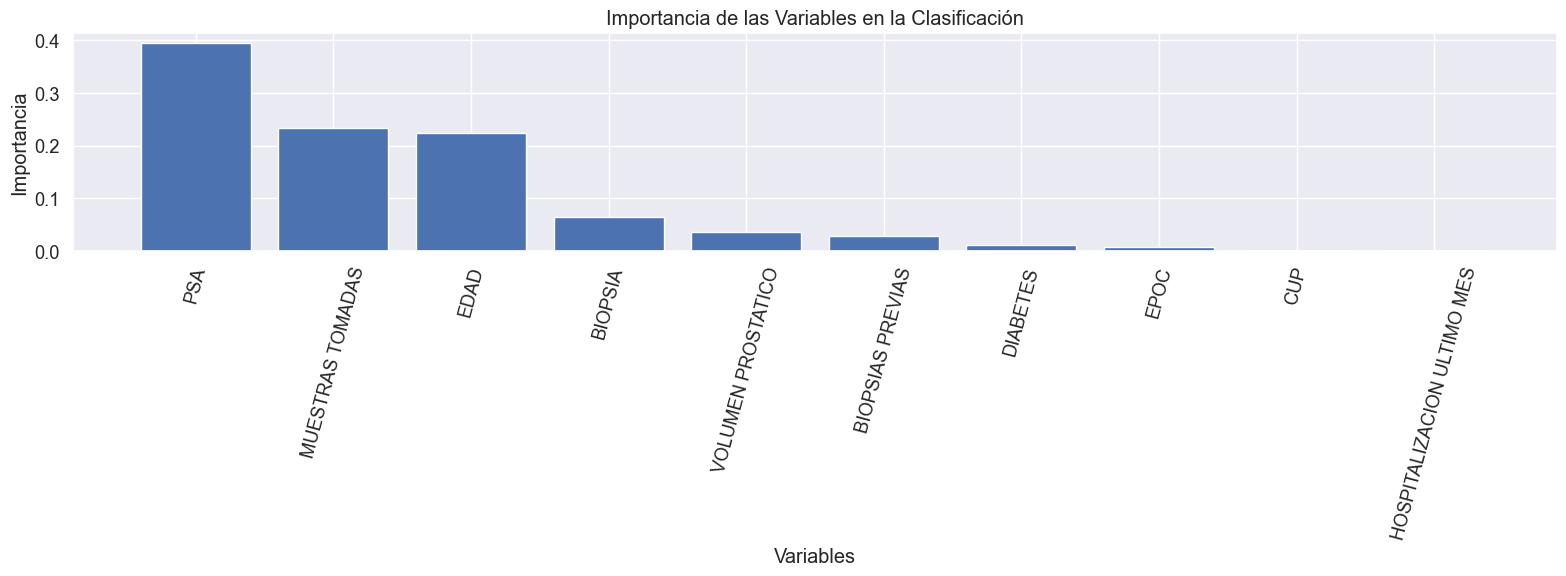

In [22]:
plt.figure(figsize=(16, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [nombres_variables[i] for i in indices], rotation=75)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.tight_layout()
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [23]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40]
Mejor_Exactitud = 0
Mejor_max_depth = None

for max_depth in max_depth_values:
    # Instanciamos el modelo de árbol de decisión con max_depth de la lista
    modelo_mejor_arbol = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=10)
    
    # Entrenamos el modelo
    modelo_mejor_arbol.fit(X_train, y_train)
    # Evaluamos el modelo en el conjunto de prueba
    y_test_pred = modelo_mejor_arbol.predict(X_test)
    Exactitud = accuracy_score(y_test, y_test_pred)
    # Verificamos si el rendimiento es mejor que el anterior
    if Exactitud > Mejor_Exactitud:
        Mejor_Exactitud = Exactitud
        Mejor_max_depth = max_depth

print("Mejor max_depth:", Mejor_max_depth, 'Exactitud:', Mejor_Exactitud)

Mejor max_depth: 16 Exactitud: 0.9954128440366973


Seguimos analizando el comportamiento del árbol de decisión

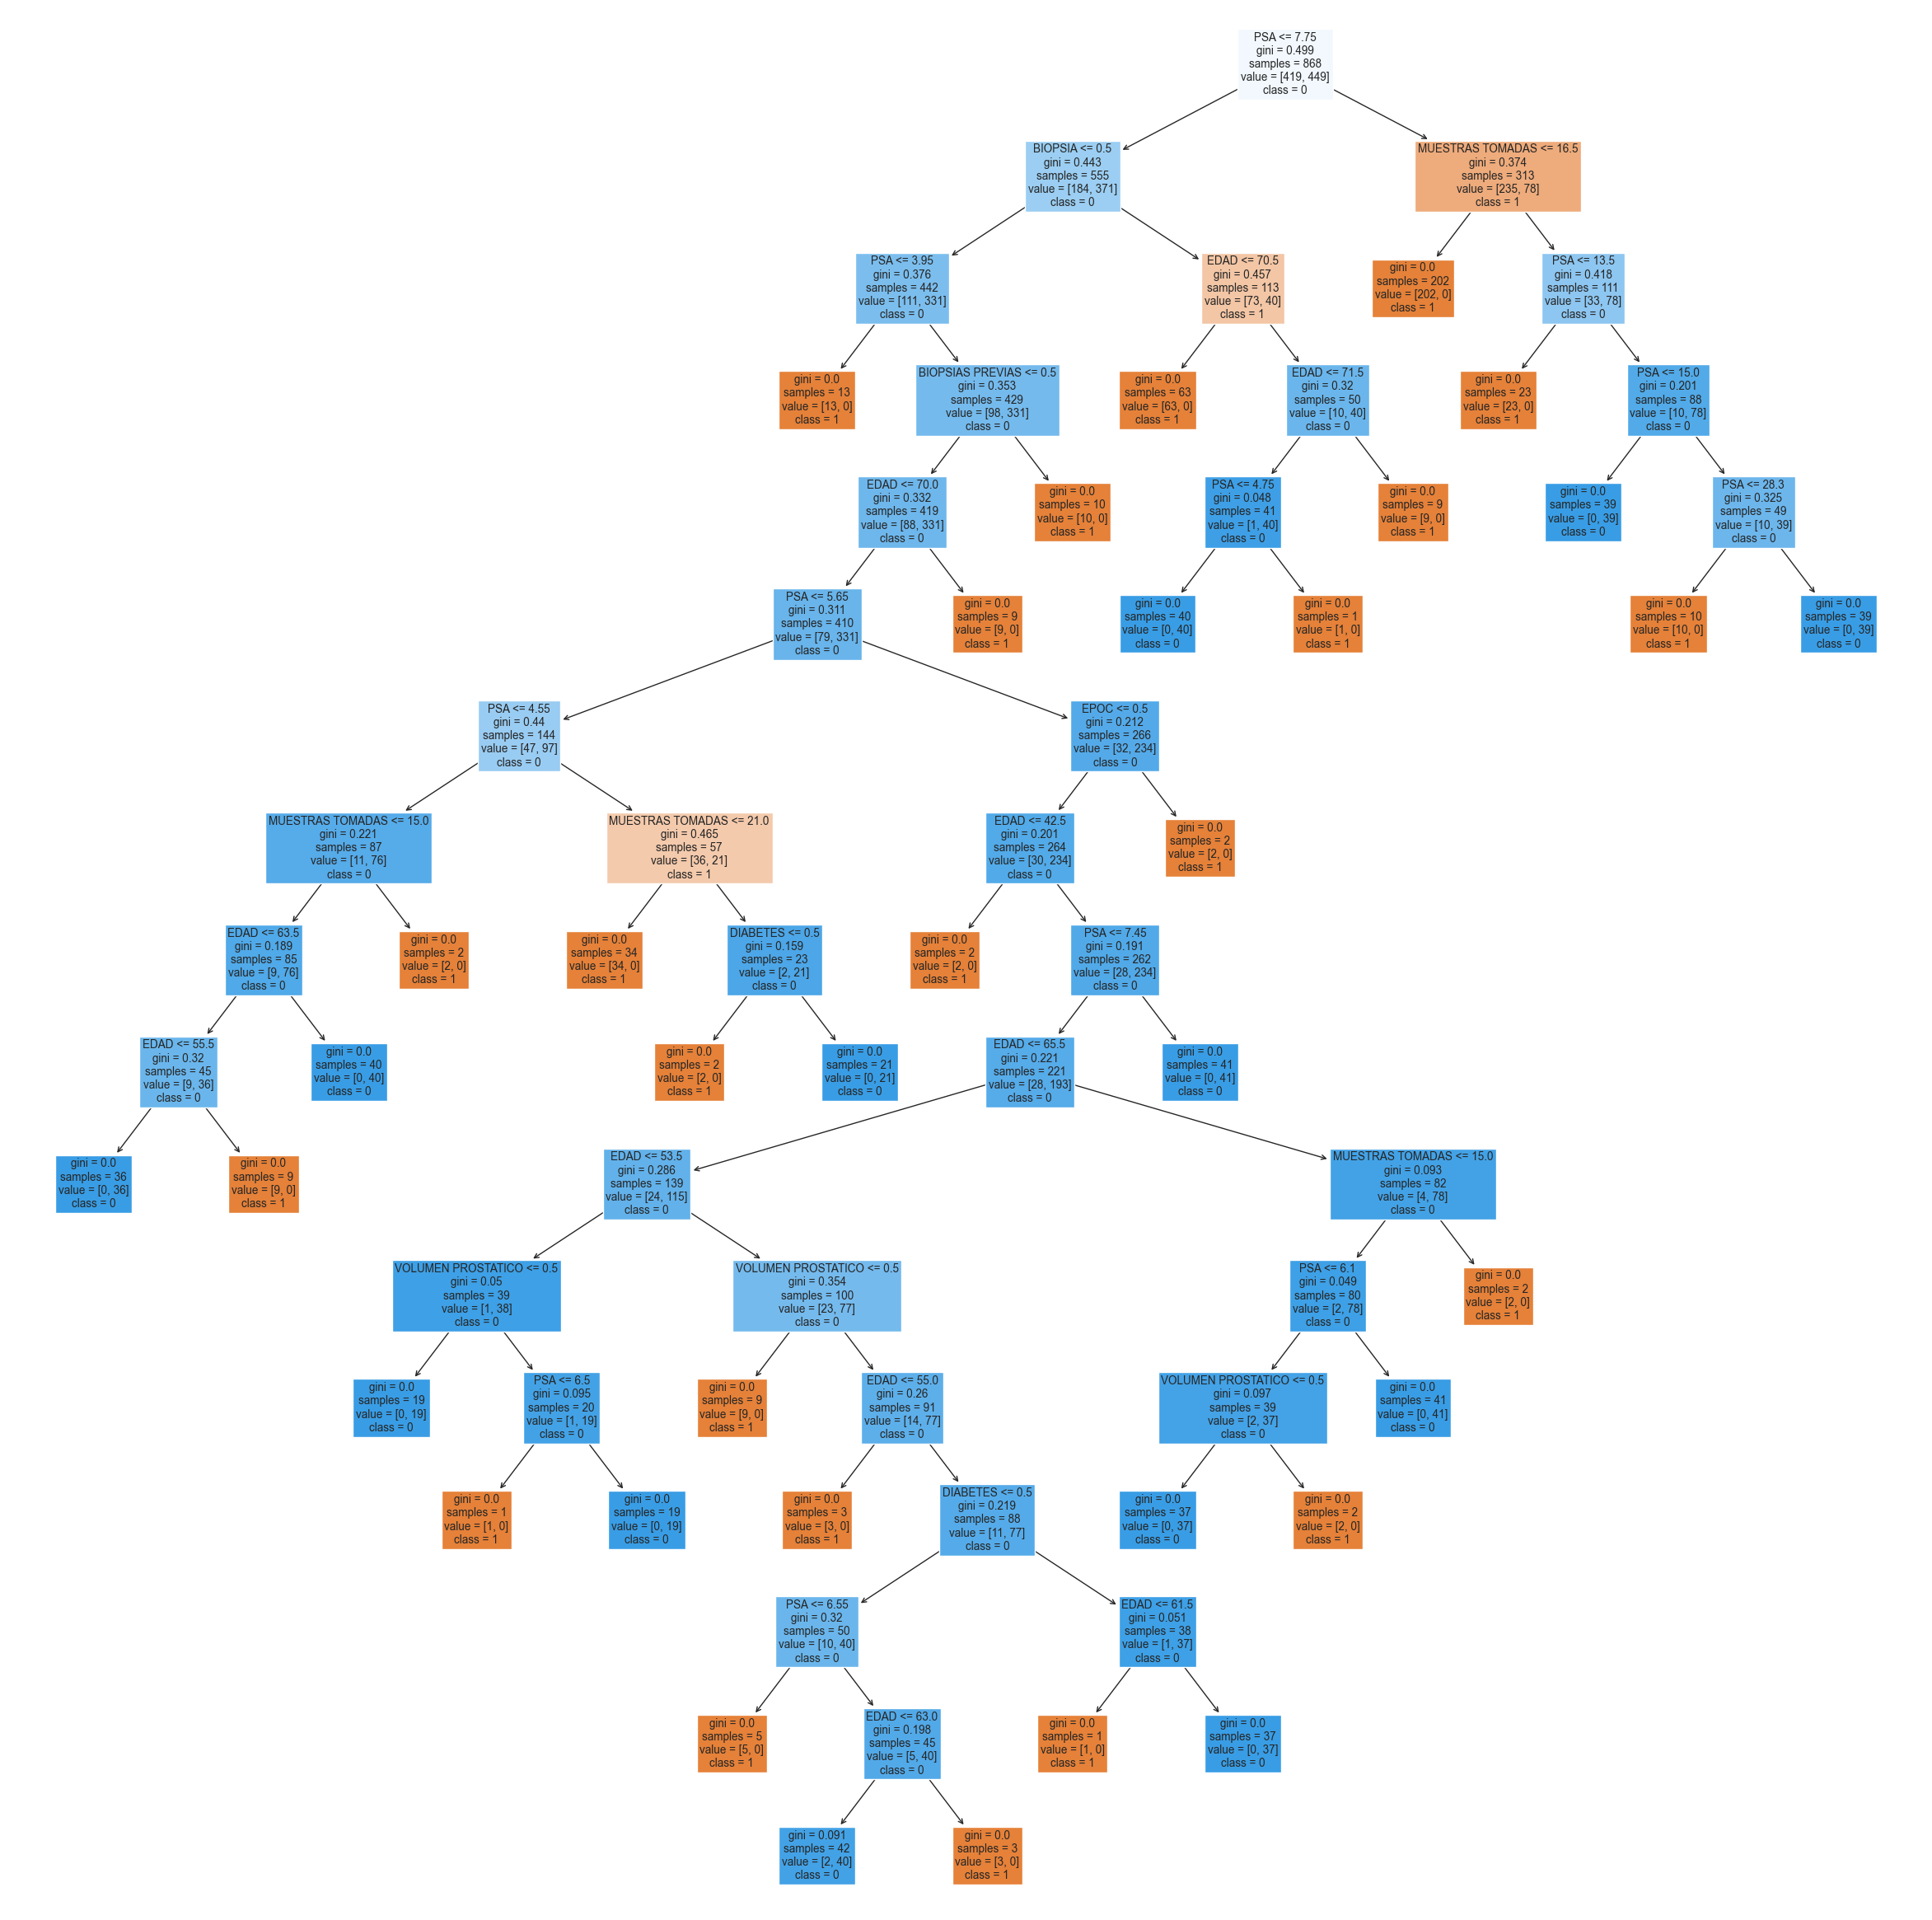

In [24]:
# Graficar el árbol de decisiones
plt.figure(figsize=(30, 30))
plot_tree(modelo_arbol, feature_names=X.columns.tolist(), class_names=['1','0'], filled=True)
plt.show()

In [25]:
print('***********************  informe de clasificación conjunto PRUEBA  **********************')
print(classification_report(y_test, y_test_pred))
print('*****************************************************************************************')
print('*******************  informe de clasificación conjunto ENTRENAMIENTO  *******************')
print(classification_report(y_train, y_train_pred))
print('*****************************************************************************************')
print('***********************  informe de clasificación conjunto TOTAL  ***********************')
print(classification_report(y, y_total_pred))
print('*****************************************************************************************')

***********************  informe de clasificación conjunto PRUEBA  **********************
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       115
         1.0       0.99      1.00      1.00       103

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218

*****************************************************************************************
*******************  informe de clasificación conjunto ENTRENAMIENTO  *******************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       419
         1.0       1.00      1.00      1.00       449

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

****************************************************************************

***

# K-Vecinos

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Proceso de normalización y escala de variables numéricas

In [26]:
b

NameError: name 'b' is not defined

In [ ]:
X_numericas = X[['EDAD','PSA','MUESTRAS TOMADAS']]
X_binarias = X.drop(columns=['EDAD','PSA','MUESTRAS TOMADAS'])

In [ ]:
scaler = StandardScaler()
X_numericas_scaler = scaler.fit_transform(X_numericas) # Ajustamos el escalador a las características numéricas y transformamos
X_normal = np.hstack((X_numericas_scaler, X_binarias)) # Combinamos las características normalizadas con las binarias

In [27]:
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)

In [31]:
X_normal_train, X_normal_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=42)

In [32]:
k_vecinos = KNeighborsClassifier(n_neighbors=1)
k_vecinos.fit(X_normal_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_test_pred = k_vecinos.predict(X_normal_test)
print('Exactitud PRUEBA:', accuracy_score(y_test, y_test_pred))

Exactitud PRUEBA: 1.0


Utilizando X_normal (Valores numéricos normalizados):

In [34]:
# Validación cruzada con cv=n divisiones de los conjuntos X e y
scores = cross_val_score(k_vecinos, X_normal, y, cv=6, scoring='f1_micro') #implícitamente hace un predict en cada cv

# Imprimimos los resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
print(scores.tolist()) # NOTA: Observar que el primer valor es igual al score del conjunto de prueba
print("F1_micro promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Resultados de la Validación Cruzada:
[0.9502762430939227, 1.0, 0.9779005524861878, 0.994475138121547, 0.988950276243094, 1.0]
F1_micro promedio: 0.9852670349907919
Desviación estándar: 0.017373814239514923


In [35]:
# Creamos un modelo de k-NN
modelo_knn = KNeighborsClassifier()

# Definimos los valores posibles de los hiperparámetros
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 15],
    'weights': ['uniform', 'distance'],
}

# Realizamos la búsqueda en cuadrícula
grid_search = GridSearchCV(modelo_knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_normal_train, y_train)

# Mostramos los mejores hiperparámetros y el mejor resultado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
#print(grid_search.cv_results_)

Mejores hiperparámetros: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor precisión: 0.9873231014550529


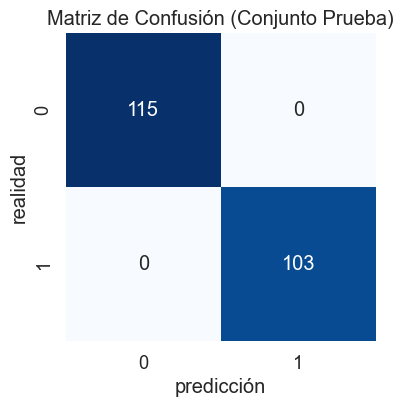

In [36]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicción')
plt.ylabel('realidad')
plt.title('Matriz de Confusión (Conjunto Prueba)')
plt.show()

Utilizando X sin normalizar los valores numéricos:

In [37]:
# Validación cruzada con cv=n divisiones de los conjuntos X e y
scores = cross_val_score(k_vecinos, X, y, cv=6, scoring='f1_micro') #implícitamente hace un predict en cada cv

# Imprimimos los resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
print(scores.tolist()) # NOTA: Observar que el primer valor es igual al score del conjunto de prueba
print("F1_micro promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Resultados de la Validación Cruzada:
[0.9558011049723757, 1.0, 0.988950276243094, 0.9779005524861878, 1.0, 1.0]
F1_micro promedio: 0.987108655616943
Desviación estándar: 0.016160155409561925


In [38]:
k_vecinos.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_test_pred = k_vecinos.predict(X_test)
y_train_pred = k_vecinos.predict(X_train)
y_total_pred = k_vecinos.predict(X)

In [40]:
print('Exactitud PRUEBA:', accuracy_score(y_test, y_test_pred))
print('Exactitud ENTRENAMIENTO:', accuracy_score(y_train, y_train_pred))
print('Exactitud TOTAL:', accuracy_score(y, y_total_pred))

Exactitud PRUEBA: 0.9954128440366973
Exactitud ENTRENAMIENTO: 0.9976958525345622
Exactitud TOTAL: 0.9972375690607734


In [41]:
print('********************* Informe de Clasificación Conjunto de PRUEBA *********************')
print(classification_report(y_test, y_test_pred))

********************* Informe de Clasificación Conjunto de PRUEBA *********************
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       115
         1.0       0.99      1.00      1.00       103

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



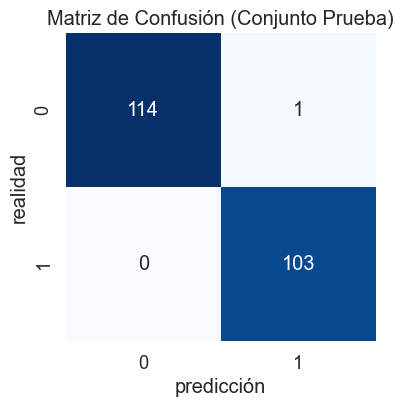

In [42]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicción')
plt.ylabel('realidad')
plt.title('Matriz de Confusión (Conjunto Prueba)')
plt.show()

Encuentre el valor óptimo para k

Algoritmo de búsqueda de valor óptimo para k

In [43]:
knn_model = KNeighborsClassifier() # Creamos una instancia del modelo
param_grid = {'n_neighbors': [1,3,5,7,11,15,25]} # Definimos la cuadrícula de parámetros a buscar
scorer = make_scorer(f1_score) # Definimos la función de puntuación personalizada usando f1_score

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring=scorer) #valdría lo mismo scoring='f1_micro'
grid_search.fit(X_train, y_train)

# Obtenemos los resultados de la búsqueda en cuadrícula
best_k = grid_search.best_params_['n_neighbors']
best_F1 = grid_search.best_score_

print("Mejor valor de k:", best_k)
print("Mejor F1_score:", best_F1)

Mejor valor de k: 1
Mejor F1_score: 0.9868729086171582


Búsqueda de optimización de otros hiperparámetros

Búsqueda en Cuadrícula. GridSearchCV

In [44]:
# Creamos un modelo de k-NN
modelo_knn = KNeighborsClassifier()

# Definimos los valores posibles de los hiperparámetros
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Realizamos la búsqueda en cuadrícula
grid_search = GridSearchCV(modelo_knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros y el mejor resultado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
#print(grid_search.cv_results_)

Mejores hiperparámetros: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor precisión: 0.9861736761676966


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [45]:
# Exactitud (Accuracy): Mide la proporción de predicciones correctas en relación con el total de predicciones.
# (puede ser engañosa si las clases están desbalanceadas (no detectar problemas de clasificación en clase minoritaria).
print('Exactitud:', accuracy_score(y_test, y_test_pred))
#print('Exactitud:', (verdaderos_positivos + verdaderos_negativos) / total_predicciones ) #Fórmula

# Precisión: Proporción de verdaderos positivos sobre todas los instancias predichas como positivas.
# Detecta falsos positivos (casos en los que clasificamos algo como positivo y no lo es).
print('Precisión:', precision_score(y_test, y_test_pred))
print(f'El {int(precision_score(y_test, y_test_pred)*100)}% de las preedicciones positivas fueron correctas')
#print(f'Precisión: {verdaderos_positivos/(verdaderos_positivos + falsos_positivos)}') #Fórmula

#Recuperación (Recall o Sensibilidad): Proporción de predicciones positivas correctas entre todos los casos
# positivos reales. Detecta falsos negativos (casos en los que clasificamos algo como negativo y es positivo).
print('Sensibilidad/Recuperación/Recall:', recall_score(y_test, y_test_pred))
print(f'El {recall_score(y_test, y_test_pred)*100}% de los casos positivos fueron detectados')
# print(f'Sensibilidad: {verdaderos_positivos / (verdaderos_positivos + falsos_negativos)}')

# F1_score: Equilibra la importancia de la precisión y la sensibilidad
print('F1_score:', f1_score(y_test, y_test_pred))

Exactitud: 0.9954128440366973
Precisión: 0.9903846153846154
El 99% de las preedicciones positivas fueron correctas
Sensibilidad/Recuperación/Recall: 1.0
El 100.0% de los casos positivos fueron detectados
F1_score: 0.9951690821256038


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/

- Se mejoró mucho balancenado los datos.
- Se mejoró eliminando los registros NaN, en lugar de otorgarle un valor calculado o estimado
- Se mejoró con validación cruzada, encontrando que el mejor número de k es 1, y el mejor criterio es uniform
- Se mejoró normalizando el conjunto de entrada X, con StandardScaler, para normalizar EDAD, PSA, y MUESTRAS TOMADAS

- Si k fuera mayor a 1, podríamos atender la ponderación del voto. Podemos asumir que las instancias que estén más cerca a 'x' probablemente sean más parecidas. Entonces, podríamos asignar un peso en la votación a cada instancia vecina de x, dándole mayor importancia a las cercanas y menos a las lejanas. Pero el k más óptimo es 1, entonces no

***

***

...

## Modelados de Experimentación

A continuación hay modelos que pueden presentar peor rendimiento. Son experimentaciones de comparación

k-vecinos descartando algunas variables poco influyentes

In [46]:
X2 = HospitalOk[['EDAD','HOSPITALIZACION ULTIMO MES','PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','MUESTRAS TOMADAS','EPOC','BIOPSIA']]
y2 = HospitalOk['HOSPITALIZACION']

X2 = X2.values # Para solucionar error
y2 = y2.values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [47]:
modelado_k_vecinos = KNeighborsClassifier(n_neighbors=1)
modelado_k_vecinos.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
y2_test_pred = modelado_k_vecinos.predict(X2_test)

In [49]:
#Búsqueda de mejor k (pruebo variando las columnas que tomo en X)
valores_k =[1,3,5,7,11,15,25]
# Creamos una instancia del modelo
modelado_k_vecinos = KNeighborsClassifier()
# Definimos la cuadrícula de parámetros a buscar
param_grid = {'n_neighbors': valores_k}
# Definimos la función de puntuación personalizada usando f1_score
scorer = make_scorer(f1_score)
# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelado_k_vecinos, param_grid, cv=5, scoring=scorer)
grid_search.fit(X2_train, y2_train)
# Obtenemos los resultados de la búsqueda en cuadrícula
mejor_k = grid_search.best_params_['n_neighbors']
mejor_F1 = grid_search.best_score_

print("Mejor valor de k:", mejor_k)
print("Mejor F1_score:", mejor_F1)

Mejor valor de k: 1
Mejor F1_score: 0.9868729086171582


Curva de Precisión Recall

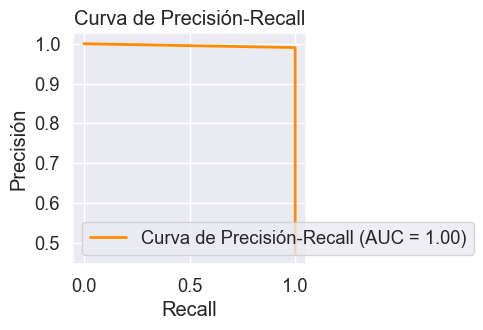

In [50]:
modelado_k_vecinos.fit(X2_train, y2_train)
# Obtenemos las probabilidades de predicción para la clase positiva
y2_test_proba = modelado_k_vecinos.predict_proba(X2_test)[:, 1]
# Calculamos la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y2_test, y2_test_proba)
# Calculamos el área bajo la curva (AUC) para la curva de precisión-recall
auc_pr = auc(recall, precision)

# Graficamos la curva de precisión-recall
plt.figure(figsize=(3,3))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva de Precisión-Recall (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend(loc='lower left')
plt.show()


Curva ROC

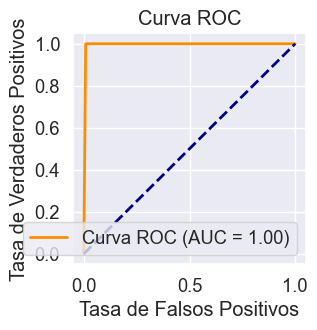

In [51]:
# Calculamos la curva ROC y el área bajo la curva (AUC) para la clase positiva
fpr, tpr, _ = roc_curve(y2_test, y2_test_proba)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


A continuación trabajaremos con el DF que tiene dummies

In [52]:
HospitalOk_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 38 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   EDAD                                                                                                   568 non-null    int64  
 1   DIABETES                                                                                               568 non-null    int64  
 2   HOSPITALIZACION ULTIMO MES                                                                             568 non-null    int64  
 3   PSA                                                                                                    564 non-null    float64
 4   BIOPSIAS PREVIAS                                                                                  

In [53]:
HospitalOk_multi.dropna(inplace=True)

In [54]:
registros_hospitalizacion_1 = HospitalOk_multi[HospitalOk_multi['HOSPITALIZACION'] == 1]
registros_hospitalizacion_0 = HospitalOk_multi[HospitalOk_multi['HOSPITALIZACION'] == 0]

nro = int(len(registros_hospitalizacion_0)/len(registros_hospitalizacion_1))

registros_hospitalizacion_1_multi = pd.concat([registros_hospitalizacion_1] * nro, ignore_index=True)
HospitalOk_multi = pd.concat([HospitalOk_multi, registros_hospitalizacion_1_multi], ignore_index=True)

In [55]:
X3 = HospitalOk_multi.drop(columns=[
'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'HOSPITALIZACION', 'TIPO_DE_CULTIVO_HEMOCULTIVO',
'TIPO_DE_CULTIVO_HEMOCULTIVO Y UROCULTIVO', 'TIPO_DE_CULTIVO_NO', 'TIPO_DE_CULTIVO_UROCULTIVO', 'AGENTE_AISLADO_E.COLI',
 'AGENTE_AISLADO_NO', 'AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA', 'PATRON_DE_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
'PATRON_DE_RESISTENCIA_MULTI SENSIBLE', 'PATRON_DE_RESISTENCIA_NO', 'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'])

y3 = HospitalOk_multi['HOSPITALIZACION']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

K-Vecinos

In [56]:
k_vecinos3 = KNeighborsClassifier(n_neighbors=5)
k_vecinos3.fit(X3, y3)

KNeighborsClassifier()

In [57]:
X3 = X3.values
y3_pred = k_vecinos3.predict(X3) # ver error

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [58]:
f1_score(y3, y3_pred)

0.9778565101860054

Árbol de Decisión

In [59]:
modelo_arbol3 = DecisionTreeClassifier(max_depth=5)
modelo_arbol3.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
y3_test_pred = modelo_arbol3.predict(X3_test)

In [61]:
f1_score(y3_test, y3_test_pred)

0.8512396694214877

# Prueba con variable objetivo COMPLICACION POST BIOPSIA SEMANA 1

Por último, probamos qué sucede si el conjunto que tomamos como variable objetivo es 'COMPLICACION POST BIOPSIA', teniendo en cuenta las dos complicaciones de semana 2 además de las complicaciones de semana 1. (La opción de no tenerlas en cuenta es lo mismo que tomar 'HOSPITALIZACION' como objetivo, ya que sí y solo sí la persona presentó COMPLICACIÓN POST BIOPSIA durante la primera semana, fue hospitalizada). Podemos decir que hospitalización y complicación en semana 1 se correlacionan en 1.00, en cambio con complicación semana 1 y otras, se correlacionan en 0.96

In [72]:
Hospital = pd.read_csv(r'HospitalModelado.csv')
HospitalOk = Hospital.copy()

In [ ]:
HospitalOk.dropna(inplace=True)

In [74]:
# Se separa el dataset según COMPLICACION POST BIOPSIA SI/NO
registros_complicacion_1 = HospitalOk[HospitalOk['COMPLICACION POST BIOPSIA'] == 1]
registros_complicacion_0 = HospitalOk[HospitalOk['COMPLICACION POST BIOPSIA'] == 0]

# Se obtiene la cantidad de veces que hay que multiplicar los registros en 1 para aproximarse a los registros en 0
nro = int(len(registros_complicacion_0)/len(registros_complicacion_1))
# Se crea un DF de n repeticiones del df con COMPLICACION POST BIOPSIA en 1
registros_complicacion_1_multi = pd.concat([registros_complicacion_1] * nro, ignore_index=True)
# Los n registros multiplicados se agregan al DF HospitalOk
HospitalOk = pd.concat([HospitalOk, registros_complicacion_1_multi], ignore_index=True)

In [ ]:
HospitalOk.info()

In [76]:
# Desetimamos datos referidos a complicaciones infecciosas
X4 = HospitalOk.drop(columns=[
'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'])
y4 = HospitalOk['COMPLICACION POST BIOPSIA']

In [77]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=0.2, random_state=42) 

In [101]:
modelo_arbol = DecisionTreeClassifier(max_depth=14, criterion='gini', min_samples_split=10, random_state=42)
modelo_arbol.fit(X4_train,y4_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=10, random_state=42)

In [102]:
y4_test_pred = modelo_arbol.predict(X4_test)

In [103]:
f1_score(y4_test, y4_test_pred)

1.0

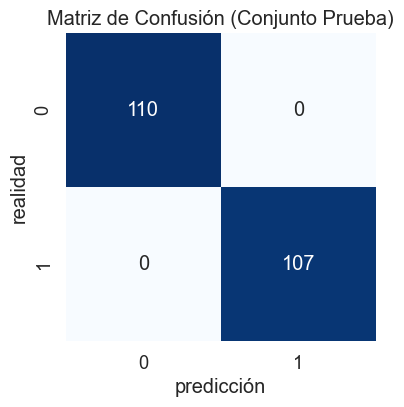

In [104]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y4_test, y4_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicción')
plt.ylabel('realidad')
plt.title('Matriz de Confusión (Conjunto Prueba)')
plt.show()

In [105]:
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 40]
Mejor_Exactitud = 0
Mejor_max_depth = None

for max_depth in max_depth_values:
    # Instanciamos el modelo de árbol de decisión con max_depth de la lista
    modelo_mejor_arbol = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=10)
    
    # Entrenamos el modelo
    modelo_mejor_arbol.fit(X4_train, y4_train)
    # Evaluamos el modelo en el conjunto de prueba
    y4_test_pred = modelo_mejor_arbol.predict(X4_test)
    Exactitud = accuracy_score(y4_test, y4_test_pred)
    # Verificamos si el rendimiento es mejor que el anterior
    if Exactitud > Mejor_Exactitud:
        Mejor_Exactitud = Exactitud
        Mejor_max_depth = max_depth

print("Mejor max_depth:", Mejor_max_depth, 'Exactitud:', Mejor_Exactitud)

Mejor max_depth: 14 Exactitud: 1.0


In [106]:
print('***********************  informe de clasificación conjunto PRUEBA  **********************')
print(classification_report(y4_test, y4_test_pred))
print('*****************************************************************************************')

***********************  informe de clasificación conjunto PRUEBA  **********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       107

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217

*****************************************************************************************
